# Import Library 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df= pd.read_csv('C:/Users/DINESH/Desktop/Company_data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [54]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [55]:
df.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [56]:
df.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [57]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

# Converting Categorical variables to Numerical variables

Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [58]:
df1 = {'Bad': 0, 'Medium': 1, 'Good': 2}
df['ShelveLoc'] = df['ShelveLoc'].map(df1)
df1 = {'Yes': 1, 'No': 0}
df['Urban'] = df['Urban'].map(df1)
df1 = {'Yes': 1, 'No': 0}
df['US'] = df['US'].map(df1)

In [59]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [60]:
df.shape

(400, 11)

Text(0, 0.5, 'Sales')

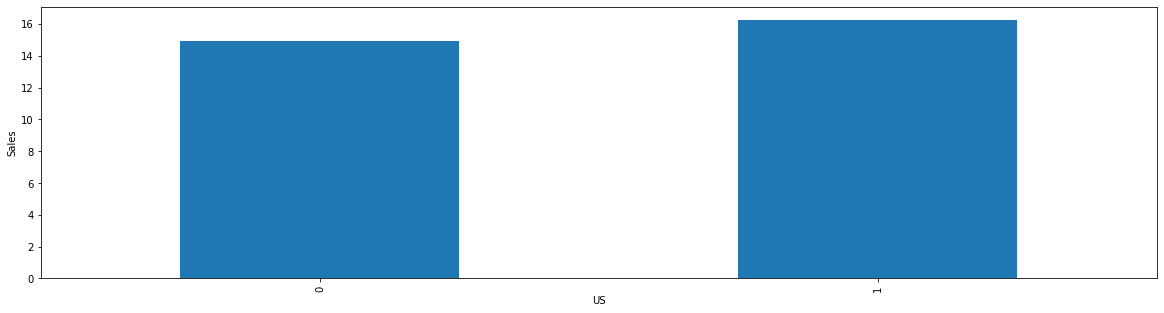

In [61]:
# Unit sales (in thousands) at each location

plt.figure(figsize=(20,5))
df.groupby('US')['Sales'].max().plot(kind='bar')
plt.ylabel('Sales')

Text(0, 0.5, 'Price')

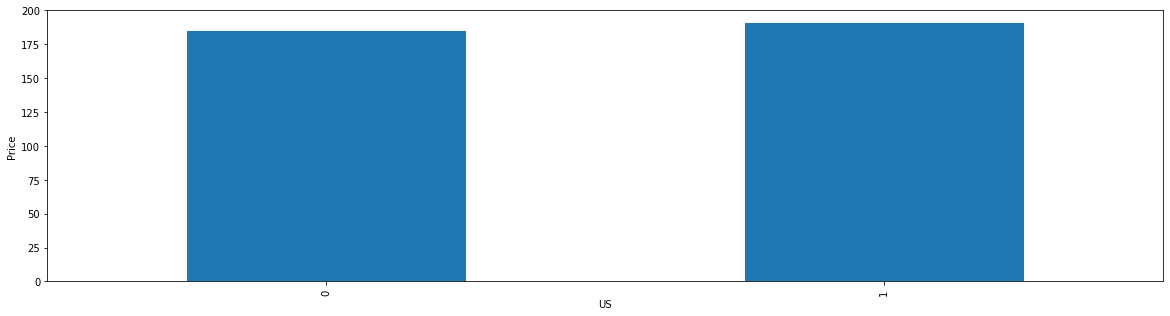

In [62]:
# Price charged by competitor at each location

plt.figure(figsize=(20,5))
df.groupby('US')['Price'].max().plot(kind='bar')
plt.ylabel('Price')

Text(0, 0.5, 'Advertising')

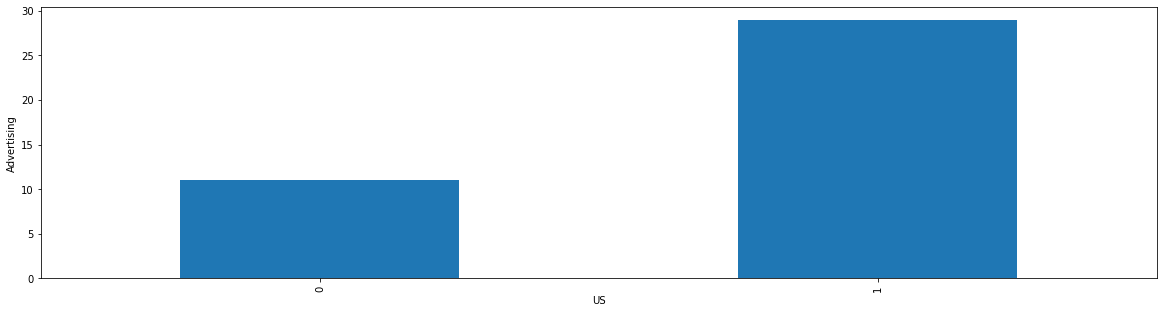

In [63]:
# Local advertising budget for company at each location (in thousands of dollars)

plt.figure(figsize=(20,5))
df.groupby('US')['Advertising'].max().plot(kind='bar')
plt.ylabel('Advertising')

C:\Users\DINESH\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Sales Distribution Plot'}, xlabel='Sales', ylabel='Density'>

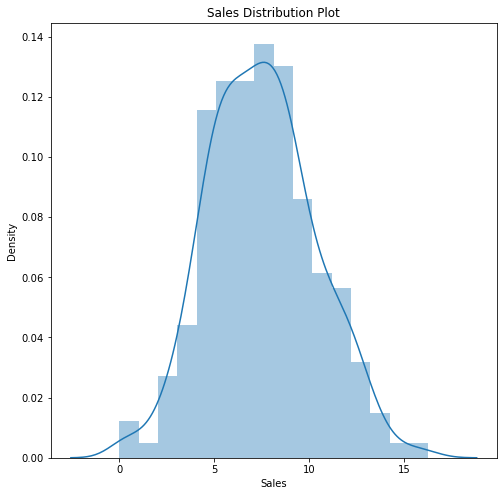

In [64]:
plt.figure(figsize=(8,8))
plt.title('Sales Distribution Plot')
sns.distplot(df['Sales'])

In [65]:
X = df.iloc[: , 1:12]
y = df.iloc[:, 0].values
X = X.values.reshape(400,-1)
y = y.reshape(-1, 1)

In [66]:
X.shape

(400, 10)

In [67]:
y.shape

(400, 1)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [69]:
from sklearn.tree import DecisionTreeRegressor 

model = DecisionTreeRegressor(max_leaf_nodes = 20)
reg = model.fit(X_train, y_train)

In [70]:
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=20, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(max_leaf_nodes=20, presort=False)

In [71]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [72]:
names = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']

In [73]:
import pandas as pd
import numpy as np
import random as rnd

rnd.seed(200)
X_new = X[rnd.randrange(X.shape[0])]
X_new = X_new.reshape(1,10)
YHat = model.predict(X_new)


df2 = pd.DataFrame(X_new, columns = names)
df2["Predicted Price"] = YHat
df2.head(1)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Predicted Price
0,121,31,0,292,109,1,79,10,1,0,6.112308


The next step is to calculate the efficiency of the prediction. We will do this using r2_score

In [74]:
from sklearn.metrics import r2_score
YHat = model.predict(X_test)

r2 = r2_score(y_test, YHat)
print("R-Squared = ", r2)

R-Squared =  0.44197663688711664


#### In regression, R-Squared is the most popular measure of goodness of fit. A value of R-Sqaured closer to 1, will indicate better fitment. Here the value is 0.44

In [75]:
from sklearn.tree import export_graphviz  
export_graphviz(model, out_file ='tree1.dot', 
               feature_names =['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'])

In [76]:
# Random Forest Classification
from sklearn.ensemble import RandomForestRegressor
from matplotlib.lines import Line2D
from scipy.stats import pearsonr

RF_SEED = 30

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RF_SEED)

In [78]:
# training data fit
regressor = RandomForestRegressor(n_estimators=1000, random_state=RF_SEED)
regressor.fit(X_train, y_train)

<ipython-input-78-f4982fc48b64>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=30)

In [79]:
predictions = regressor.predict(X_test)

In [80]:
predictions

array([ 9.77758, 12.25146, 11.26601,  6.91361, 10.40873,  7.07273,
        5.72955,  5.50057,  9.31357,  8.9984 ,  6.32858,  6.01999,
        6.50828,  6.7847 , 10.8464 ,  7.64398,  4.64462,  5.76168,
        7.63211,  5.37289,  7.94533,  5.66154,  6.65345,  5.64357,
        9.67884,  4.47158,  3.90147,  5.94833,  6.8634 ,  9.80702,
       12.78305,  6.10533,  7.76019,  8.36374,  7.11776,  9.69504,
        6.29408,  7.85898,  4.56091,  4.70109,  8.26265,  7.62644,
        7.75013,  8.08983,  8.33277,  6.41805,  6.84202,  9.4647 ,
        7.6582 ,  5.944  ,  6.86922,  6.50656,  8.39708,  9.7377 ,
        9.16919,  5.10923,  7.17524,  9.9059 ,  5.44962, 10.33143,
        4.6848 , 11.57446,  7.6954 , 10.23098,  6.56954, 11.25352,
        7.81843,  8.03139,  8.18223,  6.29785,  8.86757, 10.37787,
        8.89258,  8.52071,  6.18244,  6.9119 , 11.43172,  6.63164,
       12.31564,  5.34661])

In [81]:
features_importance = regressor.feature_importances_
 
print("Feature ranking:")
for i, data_class in enumerate(names):
    print("{}. {} ({})".format(i + 1, data_class, features_importance[i]))

Feature ranking:
1. CompPrice (0.10772448269447041)
2. Income (0.06787850810133529)
3. Advertising (0.05830095297193507)
4. Population (0.03590403790069138)
5. Price (0.2862094676782044)
6. ShelveLoc (0.3185157529942561)
7. Age (0.0838967295514363)
8. Education (0.030589187950564)
9. Urban (0.005522867156783663)
10. US (0.005458013000323293)
